# 02-2 데이터 전처리 (p.87)

In [2]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')

In [7]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [10]:
fish_target = df.loc[cond, ['Species']]
# fish_target

In [12]:
from sklearn.model_selection import train_test_split

In [20]:
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target)
#인덱스를 일치시키면서 섞고, 자른다. => 리스트로 출력
#출력된 값을 4등분 시킴.
#더 편하게 작업이 가능
# len(train_target)
# len(train_input)
#비율 확인 3:1 정도로

In [21]:
#잘섞였는지를 확인해보자.
test_target

,Species
33,Bream
14,Bream
25,Bream
147,Smelt
148,Smelt
150,Smelt
12,Bream
149,Smelt
5,Bream
28,Bream


In [23]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# kn.fit(train_input, train_target)
#train target이 데이터프레임이므로 에러가 나, 내가 가져올 index를 지정해서 적어주자.
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [24]:
kn.score(test_input, test_target['Species'])

1.0

In [27]:
kn.predict([[25, 150]])
#Smelt일 것 같아~ 라고 판단을 해줌.

C:\Users\박수똥\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

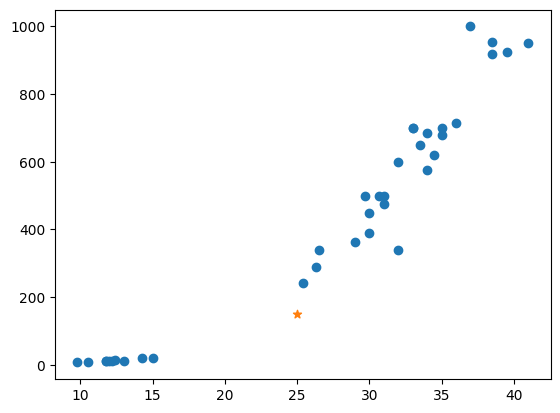

In [32]:
import matplotlib.pyplot as plt
#시각화 해보기 (산점도)

plt.scatter(train_input['Length2'], train_input['Weight'])

plt.scatter(25, 150, marker='*')
#모양을 다르게 하려는 marker 옵션으로 위에서 predict 했던 값을 넣어보기

In [33]:
kn.kneighbors([[25, 150]])
#이 데이터와 가까이 있는 점들의 데이터와, 그 거리를 출력해줌.

C:\Users\박수똥\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.32150953]]),
 array([[29,  3,  4, 18, 30]]))

#### p.99 데이터 전처리를 하겠다!
> 표준점수화해서 데이터를 학습 시키고, 평가(테스트) 한다.
> 
> 점수를 `표준점수`로 바꾸겠다
- 표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값이다.

In [35]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     27.191667
Weight     441.258333
dtype: float64
Length2     10.014087
Weight     327.479095
dtype: float64


In [37]:
train_scaled = (train_input - mean) / std
#모든 데이터에서 모든 데이터의 평균을 일괄적으로 뺌 / std

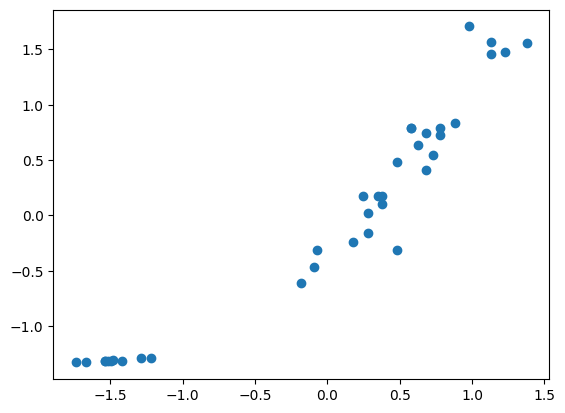

In [40]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])
#x축을 Length2로 y축을 Weight로

In [41]:
#train_scaled를 기준으로 (범위가 바뀐 것을 기준으로) 다시 학습을 시키겠다.
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [43]:
#평가를 하는 데이터도 표준점수화를 시켜야한다. 
test_scaled = (test_input - mean) / std

In [44]:
kn.score(test_scaled, test_target)

1.0

In [45]:
new = ([25, 150] - mean) / std
new

Length2   -0.218858
Weight    -0.889395
dtype: float64

In [47]:
kn.predict([new])
#=> 가상의 new 물고기는 어떤 종인가를 확인하려면,그 데이터 또한 표준 점수화 해서 predict 해야한다.

C:\Users\박수똥\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)